In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import astropy.io.fits as fits 


#from hyperfit.linfit import LinFi
import linfit as L

#### a. Read is the data from file practicum3_1.dat. The file contains two sets of data. Model 1 data are made using function f(x) = 3.2x + 1.2 and adding some noise to the data, and Model 2 are made using function (x) = 3.2x2 + 1.2. Start by plotting your data of Model 1.

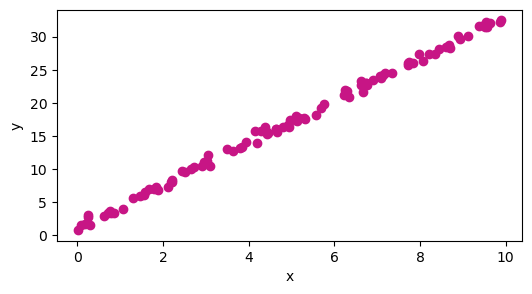

In [2]:
# reading in the data
data = np.loadtxt('practicum3_1.dat')

# getting model 1
model_1 = data[ :100, :]

# plotting
plt.figure( figsize = (6,3))
plt.plot( model_1[:,0], model_1[:,1], color='mediumvioletred', linestyle='', marker='o')
plt.xlabel('x')
dm = plt.ylabel('y')

#### b. Use the routine linfit (see your demos) to fit a linear model to the data. Assume that the data points each have an uncertainty in y of 0.5 (this is important, so explain why it makes a difference; how does your fit change if you have a σy of 0.2 or 0.9?) What are the fitted parameters of the model? Are they within 3σ of the parameters of the true line (the one we used to make the data)?

In [3]:
a, b, sa, sb, chisq, prob, covar, yfit = L.linfit(model_1[:,1], model_1[:,0],
                                                  np.repeat(0.5,len(model_1[ :,1])))

print('# a = {0:.3f} +- {1:.3f}'.format(a, sa))              # Only believe these if the rest makes sense!
print('# b = {0:.3f} +- {1:.3f}'.format(b, sb))              #   "
print('# chisq = {0:.3f}'.format(chisq))                     # Chi-squared should be close to N-m (degrees of freedom)
print('# prob  = {0:.3f}'.format(prob) )                     # Even 0.1 is believable.  Much lower (e.g., 0.001) is not!
print('# covar = ')                                          # Covariance matrix: uncertainties = sqrt(diag(covar))
print('# ' + str(covar))
print('# reduced chisq = {0:.3f}'.format(chisq / (99 - 2)))  # Chi-squared / (N-m) should be around 1

# a = 1.300 +- 0.100
# b = 3.185 +- 0.018
# chisq = 83.914
# prob  = 0.844
# covar = 
# [[ 0.00996464 -0.00151302]
 [-0.00151302  0.00030668]]
# reduced chisq = 0.865


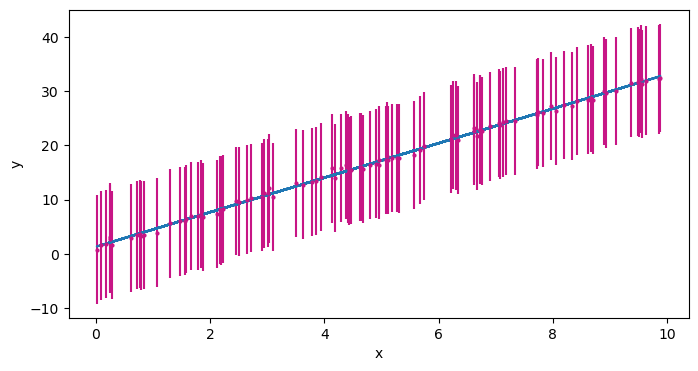

In [4]:
plt.figure( figsize = (8,4))
plt.errorbar( model_1[:,0], model_1[:,1], yerr=10, color='mediumvioletred', linestyle='', marker='o', markersize='2')

x1 = model_1[:,0]
plt.plot(x1, (b*x1+a))

plt.xlabel('x')
dm = plt.ylabel('y')

#### c. What is the probability that you would get a higher χ2 (i.e., a worse fit) by chance, if the data came from the fitted model and had the stated random error level? Plot the data and model, with reasonable axis labels and title. Save as an appropriately named PNG file

#### d. Repeat the steps b and c, but now for the second dataset (the quadratic data). Does the linfit model fit the data? Give two reasons why or why not. How can you fit the data?

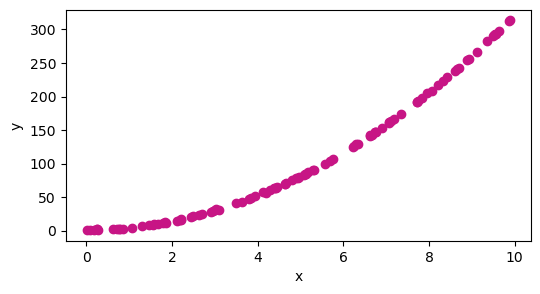

In [5]:
# getting model 1
model_2 = data[ 100:, :]

# plotting
plt.figure( figsize = (6,3))
plt.plot( model_2[:,0], model_2[:,1], color='mediumvioletred', linestyle='', marker='o')
plt.xlabel('x')
dm = plt.ylabel('y')

In [6]:
a, b, sa, sb, chisq, prob, covar, yfit = L.linfit(model_2[:,1], model_2[:,0],
                                                  np.repeat(0.5,len(model_1[ :,1])))

print('# a = {0:.3f} +- {1:.3f}'.format(a, sa))              # Only believe these if the rest makes sense!
print('# b = {0:.3f} +- {1:.3f}'.format(b, sb))              #   "
print('# chisq = {0:.3f}'.format(chisq))                     # Chi-squared should be close to N-m (degrees of freedom)
print('# prob  = {0:.3f}'.format(prob) )                     # Even 0.1 is believable.  Much lower (e.g., 0.001) is not!
print('# covar = ')                                          # Covariance matrix: uncertainties = sqrt(diag(covar))
print('# ' + str(covar))
print('# reduced chisq = {0:.3f}'.format(chisq / (99 - 2)))  # Chi-squared / (N-m) should be around 1

# a = -50.560 +- 0.100
# b = 31.571 +- 0.018
# chisq = 240064.442
# prob  = 0.000
# covar = 
# [[ 0.00996464 -0.00151302]
 [-0.00151302  0.00030668]]
# reduced chisq = 2474.891


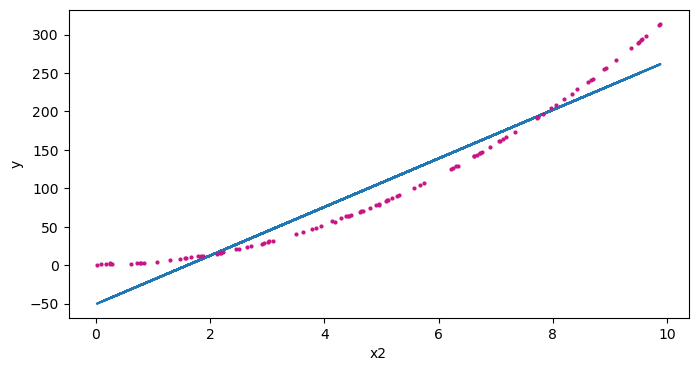

In [8]:
plt.figure( figsize = (8,4))
plt.errorbar( model_2[:,0], model_2[:,1], yerr=0.5, color='mediumvioletred', linestyle='', marker='o', markersize='2')

x = model_2[:,0]
y = model_2[:,1]
plt.plot(x, (b*x+a))

plt.xlabel('x2')
dm = plt.ylabel('y')

#### now using the curvefit to properly fit to the quadratic data!

In [9]:
from scipy.optimize import curve_fit

x = model_2[:,0]
y = model_2[:,1]

def pol2(x, a, b):
    return b * x**2 + a

(fit2, cov_x, infodict, mesg, ier) = curve_fit( pol2, x , y, 
                       full_output = True, sigma = np.repeat(0.5, len(x)), absolute_sigma=True)

fiterr = np.sqrt(np.diag(cov_x))
# check status FIRST!
print("Status: {0:d}".format(ier)) # 1 = solution found
print(mesg)
print("Reduced chi-squared:{0:.4e}".format(np.sum(pol2(x,*fit2) - y)**2 / (len(y) - fit2.size))) # reduced chi-squared
print("Results and uncertainties:")
print(np.array((fit2, fiterr)).T) # ok, now the results
print("Covariance matrix:")
print(cov_x)  # and errors, including covariance terms
print("# function evals: {0:d}".format(infodict['nfev']))

Status: 3
Both actual and predicted relative reductions in the sum of squares
  are at most 0.000000 and the relative error between two consecutive iterates is at 
  most 0.000000
Reduced chi-squared:4.0701e-15
Results and uncertainties:
[[1.28850629e+00 7.47914867e-02]
 [3.19804314e+00 1.71183592e-03]]
Covariance matrix:
[[ 5.59376648e-03 -9.52151204e-05]
 [-9.52151204e-05  2.93038223e-06]]
# function evals: 7


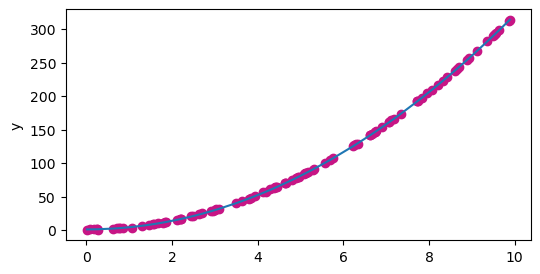

In [10]:
plt.figure(figsize = (6,3))
plt.scatter(x,y, color='mediumvioletred')

inds = np.argsort(x)


plt.plot(x[inds], pol2(x[inds], *fit2))
dm = plt.ylabel('y')

### 2. This is the start of Problem 2 of your HW5. Work on this in class and get feedback on the fly, so that you can make the function of Problem 3 easier. Sigma clipping, the technique of removing data points that are further than a few σ from your median, is a technique that allows you to clean data from outliers that shouldn’t be there. For example, you could use sigma clipping to remove pixels that should contain only ‘background’ noise in your image but don’t because your target star saturated its pixel and overflowed. Here, you will code your own sigma clipping to understand how the process works

#### a. (10 points) Create an array with 400 elements. The first 396 elements of the array should contain 396 draws from a Poisson distribution for 10,000 photons (i.e., the expected number of events occurring in a fixed-time interval should be 10,000). The last 4 elements should contain draws from the uniform distribution between 0 and $10^6$.


In [11]:
# documentation sources:
# https://numpy.org/doc/2.2/reference/random/generated/numpy.random.poisson.html
# https://numpy.org/doc/2.2/reference/random/generated/numpy.random.uniform.html

# number of photons
N = 10000

# creating our initial array
data_ccd = np.zeros(400)
# random.poisson(lam=1.0, size=None)
data_ccd[ :396] = np.random.poisson(N, 396)  #396 draws from a poisson distribution for 10,000 photons

N1 = 0
N2 = 1e6

# random.uniform(low=0.0, high=1.0, size=None)
data_ccd [396: ]= np.random.uniform( N1, N2, 4)
print(len(data_ccd))
#print(data_ccd)

400


#### b. (10 points) Calculate the standard deviation, σ, for your sample.
Then, you will mask your data. Create a subsample including only points that are
within 5σ of the median (you can do this in one line; check our intro to python
lecture for masking of data).
Print the new sample’s mean, median, and standard deviation. What has
happened?

In [14]:
print("Raw data mean: " , np.mean(data_ccd) , "Raw data median: " , np.median(data_ccd) )

sigma = np.std(data_ccd)
med_ccd = np.median(data_ccd)

low_range = med_ccd - 5*sigma
high_range = med_ccd =+ 5*sigma

filtered_data_ccd = (data_ccd[(low_range < data_ccd) & (data_ccd < high_range)] )
print(len(sig5_mask))

print("Filtered mean: " , np.mean(filtered_data_ccd) , "Filtered median: " , np.median(filtered_data_ccd) )


Raw data mean:  14856.133979197348 Raw data median:  10002.0
396
Filtered mean:  10003.257575757576 Filtered median:  9998.0
